In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
Iter_array_canonical = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
    11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
    31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
    41
]

r_norm_array_canonical = [
    1.886e-08, 5.834e-07, 2.079e-06, 9.067e-06, 1.624e-05, 2.378e-05, 3.492e-05, 5.431e-05,
    9.362e-05, 1.211e-04, 2.024e-04, 3.288e-04, 4.107e-04, 4.611e-04, 5.208e-04, 7.637e-04,
    8.375e-04, 1.198e-03, 1.336e-03, 1.581e-03, 2.626e-03, 2.824e-03, 3.336e-03, 3.628e-03,
    4.166e-03, 4.686e-03, 7.113e-03, 8.469e-03, 1.110e-02, 1.156e-02, 1.323e-02, 1.529e-02,
    1.867e-02, 2.012e-02, 2.283e-02, 2.664e-02, 3.067e-02, 3.449e-02, 3.811e-02, 4.383e-02,
    5.231e-02
]


Iter_array_perturbed = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
    11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
    31, 32, 33, 34
]

r_norm_array_perturbed = [
    1.161e-01, 1.466e-01, 1.476e-01, 1.543e-01, 1.595e-01, 1.838e-01, 1.968e-01, 2.159e-01,
    2.378e-01, 2.709e-01, 3.144e-01, 3.670e-01, 4.385e-01, 5.278e-01, 6.584e-01, 8.193e-01,
    1.043e+00, 1.351e+00, 1.732e+00, 2.276e+00, 3.326e+00, 2.621e+00, 2.020e+00, 1.329e+00,
    6.701e-01, 2.115e-01, 5.043e-02, 8.253e-03, 9.384e-04, 1.567e-04, 7.579e-05, 3.577e-05,
    1.731e-05, 6.502e-06
]

Iter_array_random = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
    11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25
]

r_norm_array_random = [
    6.914e-01, 6.948e-01, 7.123e-01, 7.537e-01, 8.287e-01, 9.517e-01, 1.148e+00, 1.419e+00,
    1.774e+00, 2.293e+00, 3.429e+00, 2.597e+00, 2.046e+00, 1.327e+00, 6.363e-01, 3.215e-01,
    1.835e-01, 8.092e-02, 2.795e-02, 6.947e-03, 1.191e-03, 1.500e-04, 2.950e-05, 1.824e-05,
    1.011e-05
]

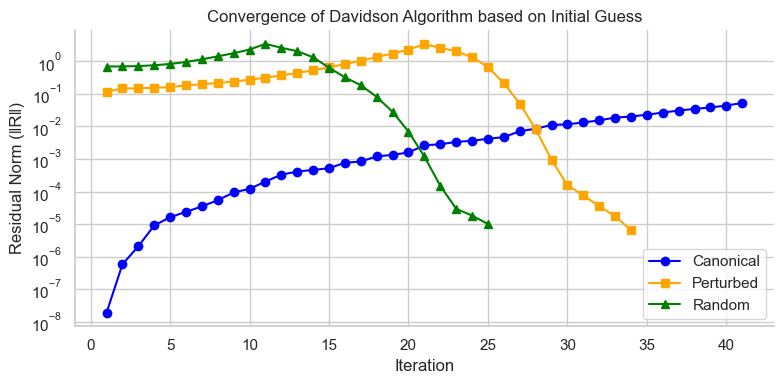

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
plt.semilogy(Iter_array_canonical, r_norm_array_canonical, marker='o', label='Canonical', color='blue')
plt.semilogy(Iter_array_perturbed, r_norm_array_perturbed, marker='s', label='Perturbed', color='orange')
plt.semilogy(Iter_array_random, r_norm_array_random, marker='^', label='Random', color='green') 
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual Norm (‖R‖)')
plt.title('Convergence of Davidson Algorithm based on Initial Guess')
plt.legend()
plt.tight_layout()
sns.despine()
plt.savefig('davidson_convergence_comparison.png', dpi=300)
plt.show()

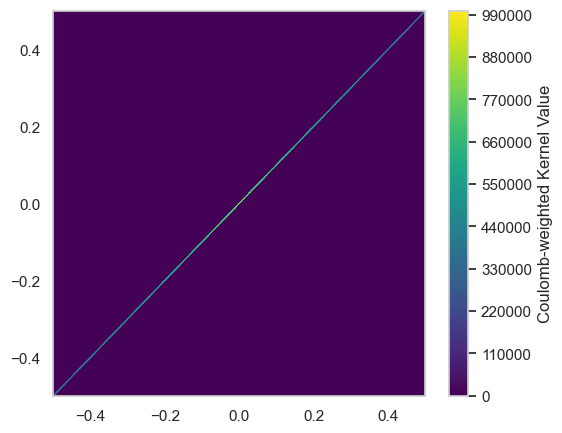

In [26]:
def curve(x1,x2,a):
    return np.exp(-(abs(x1)+ abs(x2))) / (abs(x1 - x2) + a)

x = np.linspace(-0.5, 0.5, 500)
X1, X2 = np.meshgrid(x, x)
a = 1e-6
Z = curve(X1, X2, a)
plt.figure(figsize=(6, 5))
plt.contourf(X1, X2, Z, levels=100, cmap='viridis')
plt.colorbar(label='Coulomb-weighted Kernel Value')

In [23]:
Z.shape[0]


500

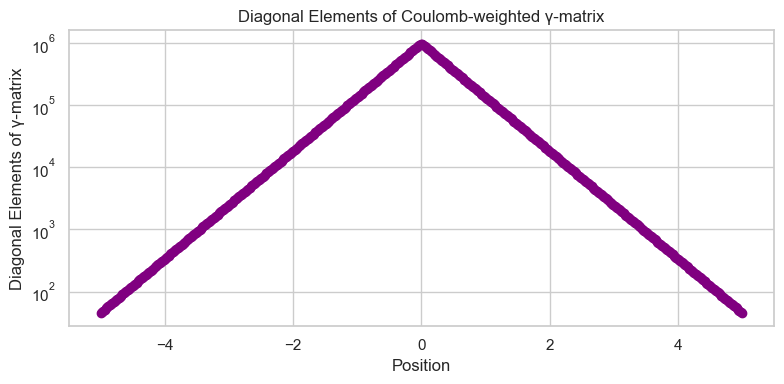

In [24]:
diagonal_elements = np.diag(Z)

plt.figure(figsize=(8, 4))
plt.semilogy(x, diagonal_elements, marker='o', linestyle='-', color='purple')
plt.xlabel('Position')
plt.ylabel('Diagonal Elements of γ-matrix')
plt.title('Diagonal Elements of Coulomb-weighted γ-matrix')
# plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

In [25]:
diagonal_elements

array([4.53999298e+01, 4.72565240e+01, 4.91890422e+01, 5.12005892e+01,
       5.32943968e+01, 5.54738290e+01, 5.77423873e+01, 6.01037166e+01,
       6.25616106e+01, 6.51200182e+01, 6.77830498e+01, 7.05549841e+01,
       7.34402743e+01, 7.64435563e+01, 7.95696551e+01, 8.28235932e+01,
       8.62105985e+01, 8.97361128e+01, 9.34058002e+01, 9.72255565e+01,
       1.01201519e+02, 1.05340075e+02, 1.09647874e+02, 1.14131837e+02,
       1.18799168e+02, 1.23657366e+02, 1.28714237e+02, 1.33977903e+02,
       1.39456824e+02, 1.45159800e+02, 1.51095996e+02, 1.57274947e+02,
       1.63706582e+02, 1.70401233e+02, 1.77369656e+02, 1.84623048e+02,
       1.92173062e+02, 2.00031827e+02, 2.08211971e+02, 2.16726634e+02,
       2.25589499e+02, 2.34814803e+02, 2.44417369e+02, 2.54412624e+02,
       2.64816627e+02, 2.75646093e+02, 2.86918422e+02, 2.98651724e+02,
       3.10864850e+02, 3.23577423e+02, 3.36809866e+02, 3.50583439e+02,
       3.64920271e+02, 3.79843397e+02, 3.95376792e+02, 4.11545414e+02,
      